In [20]:
%pylab inline
import matplotlib.gridspec as gridspec
import seaborn as sns

PAPER_PRESET = {"style": "ticks", "font": "Helvetica", "context": "paper", 
                "rc": {"font.size":20,"axes.titlesize":22,
                       "axes.labelsize":22, 'axes.linewidth': 2,
                       "legend.fontsize":20, "xtick.labelsize": 20,
                       "ytick.labelsize":20, "xtick.major.size": 8.0,
                       "ytick.major.size": 8.0, "axes.edgecolor": "black",
                       "xtick.major.pad": 3.0, "ytick.major.pad": 3.0}}
PAPER_FONTSIZE = 20
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


from collections import defaultdict
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [21]:
data = """Serum-CEA 5.87 12-Apr-2019
Serum-CEA 4.92 12-Dec-2018
Serum-AFP 2.84 12-Dec-2018
Serum-CEA 5.71 11-Aug-2018
Serum-CEA 6.14 19-May-2018
Serum-CEA 6.26 23-Apr-2018
Serum-CEA 5.24 10-Apr-2018
Serum-CEA 6.06 09-Mar-2018
Serum-CEA 5.02 05-Jan-2018
Serum-CEA 5.03 22-Dec-2017
Serum-CEA 6.16 04-Oct-2017
Serum-CEA 6.30 08-Jul-2017
Serum-CEA 6.86 11-Apr-2017
Serum-AFP 6.02 27-Dec-2016
Serum-CEA 10.85 19-Dec-2016
Serum-AFP 3.48 27-Apr-2016
Serum-CEA 44.23 01-Apr-2016"""


In [22]:
data_records = []
for line in data.split('\n'):
    line_split = line.split(' ')
    data_records.append(line_split)

In [30]:
df = pd.DataFrame(data_records, columns =['investigation', 'value', 'date'])
df["value"] = df["value"].astype(float)

In [31]:
df_cea = df.loc[df.investigation == 'Serum-CEA']

AttributeError: 'str' object has no attribute 'conjugate'

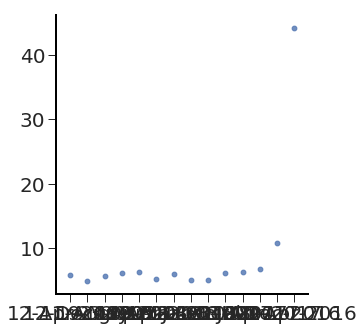

In [32]:
sns.lmplot(x='date', y='value', data=df_cea)

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


ValueError: could not convert string to float: '01-Apr-2016'

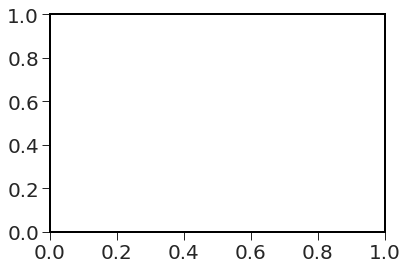

In [17]:
sns.tsplot(data=df, time='date',  unit="country",
           condition="Income Level", value="HIV Rate")